# Hypothesis test examples
As you saw from the last chapter, hypothesis testing can be a bit tricky. You need to define the null hypothesis, figure out how to simulate it, and define clearly what it means to be "more extreme" in order to compute the p-value. Like any skill, practice makes perfect, and this chapter gives you some good practice with hypothesis tests.

# 1. A/B testing
## 1.1 The vote for the Civil Rights Act in 1964
The Civil Rights Act of 1964 was one of the most important pieces of legislation ever passed in the USA. Excluding "present" and "abstain" votes, 153 House Democrats and 136 Republicans voted yea. However, 91 Democrats and 35 Republicans voted nay. Did party affiliation make a difference in the vote?

To answer this question, you will evaluate the hypothesis that the party of a House member has no bearing on his or her vote. You will use the fraction of Democrats voting in favor as your test statistic and evaluate the probability of observing a fraction of Democrats voting in favor at least as small as the observed fraction of 153/244. (That's right, at least as _small_ as. In 1964, it was the Democrats who were less progressive on civil rights issues.) To do this, permute the party labels of the House voters and then arbitrarily divide them into "Democrats" and "Republicans" and compute the fraction of Democrats voting yea.

### Instructions:
* Construct Boolean arrays, `dems` and `reps` that contain the votes of the respective parties; e.g., `dems` has 153 True entries and 91 `False` entries.
* Write a function, `frac_yea_dems(dems, reps)` that returns the fraction of Democrats that voted yea. The first input is an array of Booleans, Two inputs are required to use your `draw_perm_reps()` function, but the second is not used.
* Use your `draw_perm_reps()` function to draw 10,000 permutation replicates of the fraction of Democrat yea votes.
* Compute and print the p-value.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

def ecdf(data):
    return np.sort(data), np.arange(1, len(data)+1) / len(data)

def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))

def draw_bs_reps(data, func, size=1):
    return np.array([bootstrap_replicate_1d(data, func) for _ in range(size)])

def permutation_sample(data_1, data_2):
    permuted_data = np.random.permutation(np.concatenate((data_1, data_2)))
    return permuted_data[:len(data_1)], permuted_data[len(data_1):]

def draw_perm_reps(d1, d2, func, size=1):
    return np.array([func(*permutation_sample(d1, d2)) for i in range(size)])

def diff_of_means(data_1, data_2):
    return np.mean(data_1) - np.mean(data_2)

In [2]:
# Construct arrays of data: dems, reps
dems = np.array([True] * 153 + [False] * 91)
reps = np.array([True] * 136 + [False] * 35)

def frac_yea_dems(dems, reps):
    """Compute fraction of Democrat yea votes."""
    frac = np.sum(dems) / len(dems)
    return frac

# Acquire permutation samples: perm_replicates
perm_replicates = draw_perm_reps(dems, reps, frac_yea_dems, 10000)

# Compute and print p-value: p
p = np.sum(perm_replicates <= 153/244) / len(perm_replicates)
print('p-value =', p)

p-value = 0.0001


This small p-value suggests that party identity had a lot to do with the voting. Importantly, the South had a higher fraction of Democrat representatives, and consequently also a more racist bias.

## 1.2 What is equivalent?
You have experience matching a stories to probability distributions. Similarly, you use the same procedure for two different A/B tests if their stories match. In the Civil Rights Act example you just did, you performed an A/B test on voting data, which has a Yes/No type of outcome for each subject (in that case, a voter). Which of the following situations involving testing by a web-based company has an equivalent set up for an A/B test as the one you just did with the Civil Rights Act of 1964?

* You measure the number of people who click on an ad on your company's website before and after changing its color.

The "Democrats" are those who view the ad before the color change, and the "Republicans" are those who view it after.

## 1.3 A time-on-website analog
It turns out that you already did a hypothesis test analogous to an A/B test where you are interested in how much time is spent on the website before and after an ad campaign. The frog tongue force (a continuous quantity like time on the website) is an analog. "Before" = Frog A and "after" = Frog B. Let's practice this again with something that actually is a before/after scenario.

We return to the no-hitter data set. In 1920, Major League Baseball implemented important rule changes that ended the so-called dead ball era. Importantly, the pitcher was no longer allowed to spit on or scuff the ball, an activity that greatly favors pitchers. In this problem you will perform an A/B test to determine if these rule changes resulted in a slower rate of no-hitters (i.e., longer average time between no-hitters) using the difference in mean inter-no-hitter time as your test statistic. The inter-no-hitter times for the respective eras are stored in the arrays `nht_dead` and `nht_live`, where "nht" is meant to stand for "no-hitter time."

Since you will be using your `draw_perm_reps()` function in this exercise, it may be useful to remind yourself of its call signature: `draw_perm_reps(d1, d2, func, size=1)` or even referring back to the chapter 3 exercise in which you defined it.

### Instructions:
* Compute the observed difference in mean inter-nohitter time using `diff_of_means()`.
* Generate 10,000 permutation replicates of the difference of means using `draw_perm_reps()`.
* Compute and print the p-value.

In [3]:
df = pd.read_csv('_datasets/mlb_nohitters.csv')
t = np.concatenate(((0,), np.diff(df.game_number))).astype(int) - 1
df['time_interval'] = t
nht = df[df.date>19010000]['time_interval'].values
nht_dead = df[(df.date > 1901000) & (df.date<19200000)]['time_interval'].values
nht_live = df[df.date > 19200000]['time_interval'].values

np.random.seed(42)

In [4]:
# Compute the observed difference in mean inter-no-hitter times: nht_diff_obs
nht_diff_obs = diff_of_means(nht_dead, nht_live)

# Acquire 10,000 permutation replicates of difference in mean no-hitter time: perm_replicates
perm_replicates = draw_perm_reps(nht_dead, nht_live, diff_of_means, 10000)


# Compute and print the p-value: p
p = np.sum(perm_replicates <= nht_diff_obs) / len(perm_replicates)
print('p-val =', p)

p-val = 0.0001


Your p-value is 0.0001, which means that only one out of your 10,000 replicates had a result as extreme as the actual difference between the dead ball and live ball eras. This suggests strong statistical significance. Watch out, though, you could very well have gotten zero replicates that were as extreme as the observed value. This just means that the p-value is quite small, almost certainly smaller than 0.001.

## 1.4 What should you have done first?
That was a nice hypothesis test you just did to check out whether the rule changes in 1920 changed the rate of no-hitters. But what should you have done with the data first?

* Performed EDA, perhaps plotting the ECDFs of inter-no-hitter times in the dead ball and live ball eras.

Always a good idea to do first! I encourage you to go ahead and plot the ECDFs right now. You will see by eye that the null hypothesis that the distributions are the same is almost certainly not true.

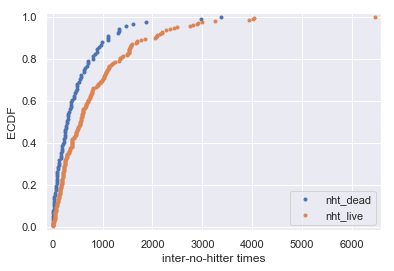

In [5]:
# Compute x,y values for ECDFs
x_nht_dead, y_nht_dead = ecdf(nht_dead)
x_nht_live, y_nht_live = ecdf(nht_live)

# Plot the ECDFs
plt.plot(x_nht_dead, y_nht_dead, marker='.', linestyle='none')
plt.plot(x_nht_live, y_nht_live, marker='.', linestyle='none')

# Set the margins
plt.margins(0.02)

# Add a legend
plt.legend(('nht_dead', 'nht_live'), loc='lower right')

# Label axes and show plot
plt.xlabel('inter-no-hitter times')
plt.ylabel('ECDF')
plt.show()

# 2. Test of correlation
## 2.1 Simulating a null hypothesis concerning correlation
The observed correlation between female illiteracy and fertility in the data set of 162 countries may just be by chance; the fertility of a given country may actually be totally independent of its illiteracy. You will test this null hypothesis in the next exercise.

To do the test, you need to simulate the data assuming the null hypothesis is true. Of the following choices, which is the best way to to do it?

* Do a permutation test: Permute the illiteracy values but leave the fertility values fixed to generate a new set of (illiteracy, fertility) data.

This exactly simulates the null hypothesis and does so more efficiently than the last option. It is exact because it uses all data and eliminates any correlation because which illiteracy value pairs to which fertility value is shuffled.

## 2.2 Hypothesis test on Pearson correlation
The observed correlation between female illiteracy and fertility may just be by chance; the fertility of a given country may actually be totally independent of its illiteracy. You will test this hypothesis. To do so, permute the illiteracy values but leave the fertility values fixed. This simulates the hypothesis that they are totally independent of each other. For each permutation, compute the Pearson correlation coefficient and assess how many of your permutation replicates have a Pearson correlation coefficient greater than the observed one.

The function `pearson_r()` that you wrote in the prequel to this course for computing the Pearson correlation coefficient is already in your name space.

### Instructions:
* Compute the observed Pearson correlation between `illiteracy` and `fertility`.
* Initialize an array to store your permutation replicates.
* Write a `for` loop to draw 10,000 replicates:
    * Permute the `illiteracy` measurements using `np.random.permutation()`.
    * Compute the Pearson correlation between the permuted illiteracy array, `illiteracy_permuted`, and `fertility`.
* Compute and print the p-value from the replicates.

In [6]:
def pearson_r(data_1, data_2):
    return np.corrcoef(data_1, data_2)[0,1]

df = pd.read_csv('_datasets/female_literacy_fertility.csv')
illiteracy = 100 - df['female literacy'].values
fertility = df['fertility'].values

np.random.seed(42)

In [7]:
# Compute observed correlation: r_obs
r_obs = pearson_r(illiteracy, fertility)

# Initialize permutation replicates: perm_replicates
perm_replicates = np.empty(10000)

# Draw replicates
for i in range(10000):
    # Permute illiteracy measurments: illiteracy_permuted
    illiteracy_permuted = np.random.permutation(illiteracy)

    # Compute Pearson correlation
    perm_replicates[i] = pearson_r(illiteracy_permuted, fertility)

# Compute p-value: p
p = np.sum(r_obs <= perm_replicates) / len(perm_replicates)
print('p-val =', p)

p-val = 0.0


You got a p-value of zero. In hacker statistics, this means that your p-value is very low, since you never got a single replicate in the 10,000 you took that had a Pearson correlation greater than the observed one. You could try increasing the number of replicates you take to continue to move the upper bound on your p-value lower and lower.

## 2.3 Do neonicotinoid insecticides have unintended consequences?
As a final exercise in hypothesis testing before we put everything together in our case study in the next chapter, you will investigate the effects of neonicotinoid insecticides on bee reproduction. These insecticides are very widely used in the United States to combat aphids and other pests that damage plants.

In a recent study, Straub, et al. ([Proc. Roy. Soc. B, 2016](https://royalsocietypublishing.org/doi/10.1098/rspb.2016.0506)) investigated the effects of neonicotinoids on the sperm of pollinating bees. In this and the next exercise, you will study how the pesticide treatment affected the count of live sperm per half milliliter of semen.

First, we will do EDA, as usual. Plot ECDFs of the alive sperm count for untreated bees (stored in the Numpy array `control`) and bees treated with pesticide (stored in the Numpy array `treated`).

### Instructions:
* Use your `ecdf()` function to generate `x,y` values from the `control` and `treated` arrays for plotting the ECDFs.
* Plot the ECDFs on the same plot.

In [8]:
df = pd.read_csv('_datasets/bee_sperm.csv', comment='#')
control = df.loc[df['Treatment']=='Control', 'Alive Sperm Millions'].values * 2
treated = df.loc[df['Treatment']=='Pesticide', 'Alive Sperm Millions'].values * 2

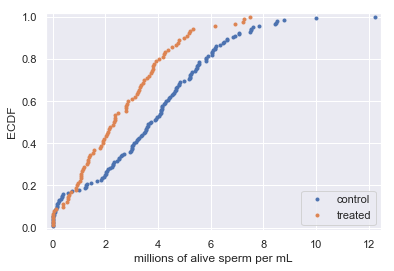

In [9]:
# Compute x,y values for ECDFs
x_control, y_control = ecdf(control)
x_treated, y_treated = ecdf(treated)

# Plot the ECDFs
plt.plot(x_control, y_control, marker='.', linestyle='none')
plt.plot(x_treated, y_treated, marker='.', linestyle='none')

# Set the margins
plt.margins(0.02)

# Add a legend
plt.legend(('control', 'treated'), loc='lower right')

# Label axes and show plot
plt.xlabel('millions of alive sperm per mL')
plt.ylabel('ECDF')
plt.show()

The ECDFs show a pretty clear difference between the treatment and control; treated bees have fewer alive sperm. Let's now do a hypothesis test in the next exercise.

## 2.4 Bootstrap hypothesis test on bee sperm counts
Now, you will test the following hypothesis: On average, male bees treated with neonicotinoid insecticide have the same number of active sperm per milliliter of semen than do untreated male bees. You will use the difference of means as your test statistic.

For your reference, the call signature for the `draw_bs_reps()` function you wrote in chapter 2 is `draw_bs_reps(data, func, size=1)`.

### Instructions:
* Compute the mean alive sperm count of `control` minus that of `treated`.
* Compute the mean of all alive sperm counts. To do this, first concatenate `control` and `treated` and take the mean of the concatenated array.
* Generate shifted data sets for both `control` and `treated` such that the shifted data sets have the same mean. This has already been done for you.
* Generate 10,000 bootstrap replicates of the mean each for the two shifted arrays. Use your `draw_bs_reps()` function.
* Compute the bootstrap replicates of the difference of means.
* The code to compute and print the p-value has been written for you. Hit 'Submit Answer' to see the result!

In [10]:
np.random.seed(42)

# Compute the difference in mean sperm count: diff_means
diff_means = np.mean(control)-np.mean(treated)

# Compute mean of pooled data: mean_count
mean_count = np.concatenate([control, treated]).mean()

# Generate shifted data sets
control_shifted = control - np.mean(control) + mean_count
treated_shifted = treated - np.mean(treated) + mean_count

# Generate bootstrap replicates
bs_reps_control = draw_bs_reps(control_shifted, np.mean, size=10000)
bs_reps_treated = draw_bs_reps(treated_shifted, np.mean, size=10000)

# Get replicates of difference of means: bs_replicates
bs_replicates = bs_reps_control - bs_reps_treated

# Compute and print p-value: p
p = np.sum(bs_replicates >= np.mean(control) - np.mean(treated)) \
            / len(bs_replicates)
print('p-value =', p)

p-value = 0.0


The p-value is small, most likely less than 0.0001, since you never saw a bootstrap replicated with a difference of means at least as extreme as what was observed. 